In [ ]:
# import yfinance as yf
# import pandas as pd
# from datetime import datetime
# import os

# def download_crypto_data(tickers, start_date="2020-01-01", end_date=None, folder="crypto_data"):
#     """
#     Downloads historical crypto data from Yahoo Finance and saves as CSV files.

#     Args:
#         tickers (dict): Dictionary of {symbol: "Full Name"} pairs
#         start_date (str): Start date in YYYY-MM-DD format
#         end_date (str): End date in YYYY-MM-DD format (defaults to today)
#         folder (str): Folder to save CSV files
#     """
#     if end_date is None:
#         end_date = datetime.today().strftime('%Y-%m-%d')

#     # Create folder if it doesn't exist
#     os.makedirs(folder, exist_ok=True)

#     for symbol, name in tickers.items():
#         try:
#             # Yahoo Finance uses -USD suffix for crypto
#             ticker_symbol = f"{symbol}-USD"

#             print(f"Downloading {name} ({symbol}) from {start_date} to {end_date}...")

#             # Download data
#             data = yf.download(
#                 ticker_symbol,
#                 start=start_date,
#                 end=end_date,
#                 progress=False
#             )

#             if not data.empty:
#                 # Save to CSV
#                 filename = f"{folder}/{symbol}_historical.csv"
#                 data.to_csv(filename)
#                 print(f"Saved {filename} ({len(data)} rows)")
#             else:
#                 print(f"No data found for {symbol}")

#         except Exception as e:
#             print(f"Error downloading {symbol}: {str(e)}")



In [ ]:
# # Example usage
# crypto_tickers = {
#     "SOL": "SOLANA"
#     # Add all other coins from your list
#     # Format: "SYMBOL": "Full Name"
# }

# download_crypto_data(crypto_tickers, start_date="2021-06-10",end_date="2021-07-08")

In [ ]:
import pandas as pd


In [ ]:
# cake=pd.read_csv("/content/CAKE_historical.csv")

In [ ]:
# pip install python-binance

In [ ]:
# from binance.client import Client
# import pandas as pd

# # Initialize Binance API (no keys needed for public data)
# client = Client()

# def get_minute_data(symbol, lookback_days=30):
#     frame = pd.DataFrame(client.get_historical_klines(
#         symbol,
#         Client.KLINE_INTERVAL_1MINUTE,
#         f"{lookback_days} days ago UTC"
#     ))
#     frame = frame.iloc[:, :6]  # Keep: time, open, high, low, close, volume
#     frame.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
#     frame['time'] = pd.to_datetime(frame['time'], unit='ms')
#     frame.set_index('time', inplace=True)
#     frame = frame.astype(float)
#     return frame

# # Top 5 cryptos (Binance symbols)
# symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'SOLUSDT', 'XRPUSDT']

# # Fetch data
# minute_data = {}
# for s in symbols:
#     minute_data[s] = get_minute_data(s)
#     print(f"Fetched {len(minute_data[s])} minutes of {s} data")
#     minute_data[s].to_csv(f"{s}_1min.csv")  # Save to CSV

# # Example: Access Bitcoin data
# print(minute_data['BTCUSDT'].head())

In [ ]:
# pip install requests pandas


In [ ]:
# import requests
# import pandas as pd
# from datetime import datetime

# # API endpoint
# url = 'https://min-api.cryptocompare.com/data/v2/histominute'

# # Function to fetch data
# def fetch_crypto_data(symbol, limit=2000):
#     params = {
#         'fsym': symbol,
#         'tsym': 'USD',
#         'limit': limit,     # Max 2000 per call
#         'aggregate': 1,     # 1-minute intervals
#         'e': 'Binance'      # Exchange: Binance
#     }
#     response = requests.get(url, params=params)
#     data = response.json()['Data']['Data']

#     df = pd.DataFrame(data)
#     df['time'] = pd.to_datetime(df['time'], unit='s')
#     df.set_index('time', inplace=True)
#     return df[['close']].rename(columns={'close': symbol.lower() + '_price'})

# # Fetch last 2000 minutes (~33 hours) of data
# btc_df = fetch_crypto_data('BTC')
# eth_df = fetch_crypto_data('ETH')

# # Join
# combined = btc_df.join(eth_df)

# # Resample to 5-minute intervals
# combined_5min = combined.resample('5T').mean()

# print(combined_5min.head())


In [ ]:
# import requests
# import pandas as pd
# from datetime import datetime

# # API endpoint
# url = 'https://min-api.cryptocompare.com/data/v2/histominute'

# # Function to fetch data
# def fetch_crypto_data(symbol, limit=2000):
#     params = {
#         'fsym': symbol,
#         'tsym': 'USD',
#         'limit': limit,     # Max 2000 per call
#         'aggregate': 1,     # 1-minute intervals
#         'e': 'Binance'      # Exchange: Binance
#     }
#     response = requests.get(url, params=params)

#     # Check the response status code
#     if response.status_code != 200:
#         print(f"Error: Status code {response.status_code}, Response: {response.text}")
#         return pd.DataFrame()  # Return empty DataFrame if error

#     data = response.json()
#     # Check for error messages in the response
#     if data.get('Response') == 'Error':
#         print(f"API Error: {data.get('Message')}")
#         return pd.DataFrame()

#     # Access data using correct keys (based on the API response)
#     data = data['Data']['Data']

#     df = pd.DataFrame(data)
#     df['time'] = pd.to_datetime(df['time'], unit='s')
#     df.set_index('time', inplace=True)
#     return df[['close']].rename(columns={'close': symbol.lower() + '_price'})

# # Fetch last 2000 minutes (~33 hours) of data
# btc_df = fetch_crypto_data('BTC')
# eth_df = fetch_crypto_data('ETH')

# # Join
# combined = btc_df.join(eth_df)

# # Resample to 5-minute intervals
# combined_5min = combined.resample('5T').mean()

# print(combined_5min.head())

In [ ]:
# import requests
# import pandas as pd
# from datetime import datetime

# # Base URL
# url = 'https://min-api.cryptocompare.com/data/v2/histominute'

# # Updated function with safe parsing
# def fetch_crypto_data(symbol, limit=2000):
#     params = {
#         'fsym': symbol,
#         'tsym': 'USD',
#         'limit': limit,
#         'aggregate': 1
#         # You can also add 'e': 'Binance' if needed
#     }
#     response = requests.get(url, params=params)
#     result = response.json()

#     # Safety check
#     if result['Response'] != 'Success' or 'Data' not in result:
#         print("API error:", result)
#         return None

#     data = result['Data']['Data']  # Correct structure now

#     df = pd.DataFrame(data)
#     df['time'] = pd.to_datetime(df['time'], unit='s')
#     df.set_index('time', inplace=True)
#     return df[['close']].rename(columns={'close': f'{symbol.lower()}_price'})


In [ ]:
# btc_df = fetch_crypto_data('BTC')
# eth_df = fetch_crypto_data('ETH')
# combined = btc_df.join(eth_df)
# print(combined.head())
# btc_df

In [ ]:
# import requests
# import pandas as pd
# from datetime import datetime, timedelta
# import time

# def fetch_crypto_data(symbol, total_minutes=10080):
#     url = 'https://min-api.cryptocompare.com/data/v2/histominute'
#     dfs = []
#     limit_per_call = 2000  # Max allowed by CryptoCompare

#     # Start from 'now'
#     toTs = int(time.time())  # Current Unix timestamp

#     while total_minutes > 0:
#         limit = min(limit_per_call, total_minutes)
#         params = {
#             'fsym': symbol,
#             'tsym': 'USD',
#             'limit': limit - 1,  # limit=n returns n+1 points
#             'toTs': toTs,
#             'aggregate': 1
#         }

#         response = requests.get(url, params=params)
#         result = response.json()

#         if result['Response'] != 'Success':
#             print("API Error:", result)
#             break

#         data = result['Data']['Data']
#         df = pd.DataFrame(data)
#         df['time'] = pd.to_datetime(df['time'], unit='s')
#         df.set_index('time', inplace=True)
#         dfs.append(df[['close']].rename(columns={'close': f'{symbol.lower()}_price'}))

#         # Prepare for next loop
#         if len(df) > 0:
#             earliest_time = df.index.min()
#             toTs = int(earliest_time.timestamp()) - 1  # move back 1 second
#         else:
#             break

#         total_minutes -= limit
#         time.sleep(0.25)  # polite pause (avoid API rate limits)

#     # Combine all parts
#     full_df = pd.concat(dfs).sort_index()
#     return full_df

# # Example usage
# btc_df = fetch_crypto_data('BTC')
# eth_df = fetch_crypto_data('ETH')

# # Join BTC and ETH
# combined = btc_df.join(eth_df)

# # Save to CSV if you want
# combined.to_csv('btc_eth_1min.csv')

# print(combined.head())


In [ ]:
# import requests
# import pandas as pd
# from datetime import datetime
# import time

# def fetch_crypto_data(symbol, total_minutes=10080):
#     url = 'https://min-api.cryptocompare.com/data/v2/histominute'
#     dfs = []
#     limit_per_call = 2000
#     toTs = int(time.time())

#     while total_minutes > 0:
#         limit = min(limit_per_call, total_minutes)
#         params = {
#             'fsym': symbol,
#             'tsym': 'USD',
#             'limit': limit - 1,
#             'toTs': toTs,
#             'aggregate': 1
#         }
#         response = requests.get(url, params=params)
#         result = response.json()

#         if result['Response'] != 'Success':
#             print(f"API Error for {symbol}:", result)
#             break

#         data = result['Data']['Data']
#         df = pd.DataFrame(data)
#         df['time'] = pd.to_datetime(df['time'], unit='s')
#         df.set_index('time', inplace=True)
#         dfs.append(df[['close']].rename(columns={'close': f'{symbol.lower()}_price'}))

#         if len(df) > 0:
#             earliest_time = df.index.min()
#             toTs = int(earliest_time.timestamp()) - 1
#         else:
#             break

#         total_minutes -= limit
#         time.sleep(0.25)

#     full_df = pd.concat(dfs).sort_index()
#     return full_df

# # List of coins
# coins = ['BTC', 'ETH', 'BNB', 'SOL', 'XRP']

# # Fetch data for all coins
# dfs = [fetch_crypto_data(coin) for coin in coins]

# # Merge all into one DataFrame
# combined = pd.concat(dfs, axis=1)

# # Drop any rows with missing data (due to slight timing mismatch)
# combined = combined.dropna()

# # Save if you want
# combined.to_csv('top5_crypto_1min.csv')

# print(combined.head())


In [ ]:
combined=pd.read_csv("/content/combined.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_delayed_correlation(df, coin1, coin2, max_lag=60):
    x = df[f'{coin1.lower()}_price_shifted']
    y = df[f'{coin2.lower()}_price']

    lags = range(-max_lag, max_lag + 1)
    corr = [x.corr(y.shift(lag)) for lag in lags]

    plt.figure(figsize=(10, 5))
    plt.plot(lags, corr, marker='o')
    plt.title(f"Delayed Correlation between {coin1} and {coin2}")
    plt.xlabel('Lag (minutes)')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.show()



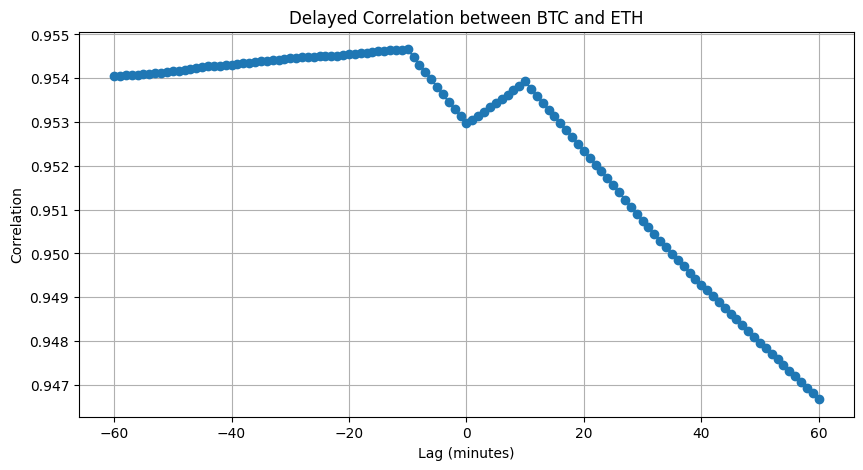

In [ ]:

# Make a copy of your original dataframe
combined_shifted = combined.copy()

# Shift BTC prices forward by 10 minutes (creates NaNs for last 10 values)
combined_shifted['btc_price_shifted'] = combined_shifted['btc_price'].shift(-10)

# Move the last 10 BTC values to the beginning
last_10_btc = combined_shifted['btc_price'].iloc[-10:]
combined_shifted.loc[combined_shifted.index[:10], 'btc_price_shifted'] = last_10_btc.values



# Plot correlation between shifted BTC and ETH
plot_delayed_correlation(combined_shifted, 'BTC', 'ETH', max_lag=60)

In [ ]:
import numpy as np

# Calculate log returns (percent change between minutes)
for coin in ['btc', 'eth', 'bnb', 'sol', 'xrp']:
    combined[f'{coin}_log_return'] = np.log(combined[f'{coin}_price'] / combined[f'{coin}_price'].shift(1))

In [ ]:
def normalize_returns(series):
    mean_return = series.mean()  # Should be close to 0
    print(f"Mean return: {mean_return:.6f}")  # Verification

    normalized = []
    for i in range(len(series)):
        # Exclude current point for std calculation
        std = series.drop(series.index[i]).std()
        normalized.append((series.iloc[i] - mean_return) / std)

    return pd.Series(normalized, index=series.index)

# Apply to each cryptocurrency
for coin in ['btc', 'eth', 'bnb', 'sol', 'xrp']:
    combined[f'{coin}_norm_return'] = normalize_returns(combined[f'{coin}_log_return'].dropna())

Mean return: 0.000011
Mean return: 0.000012
Mean return: 0.000002
Mean return: 0.000009
Mean return: 0.000007


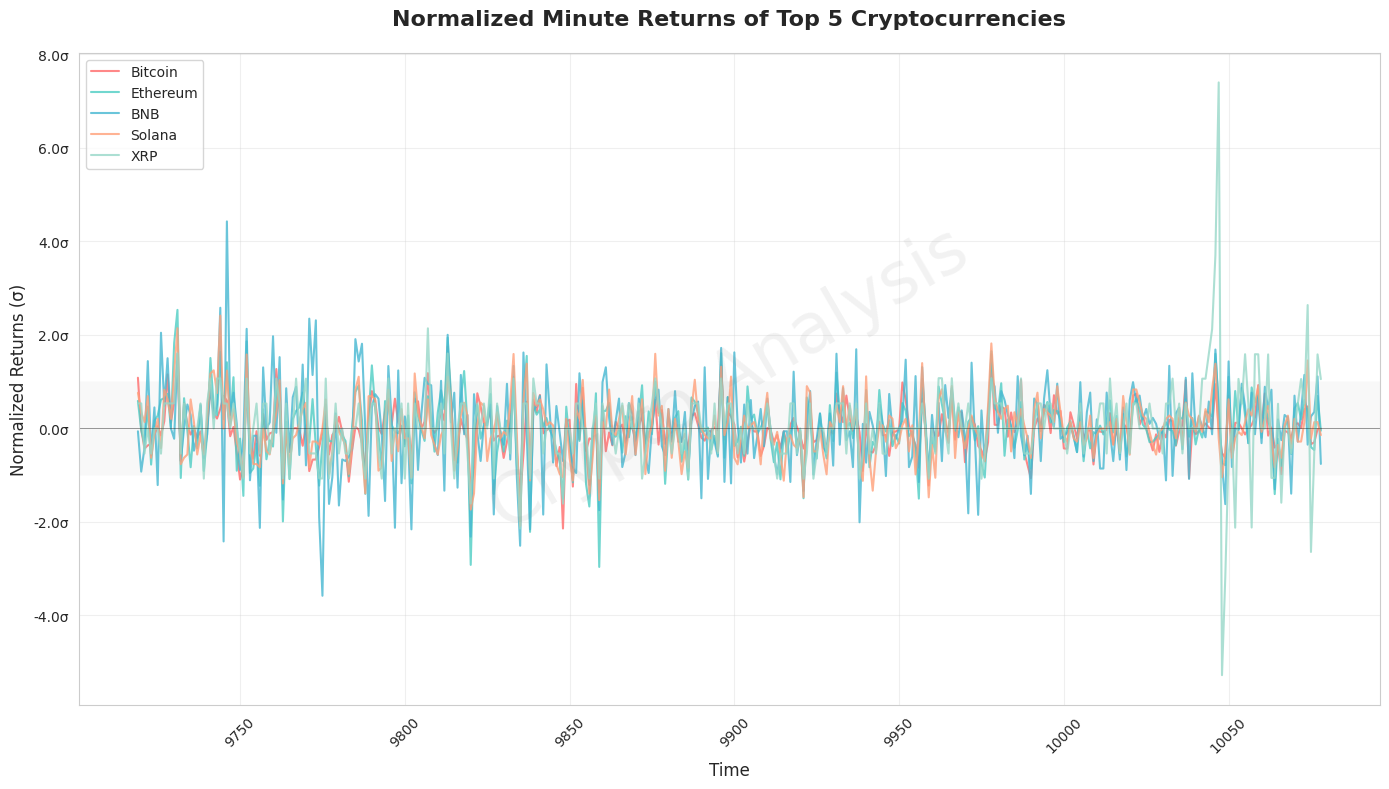

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']  # Modern color palette

# Create time window to plot (e.g., last 6 hours for clarity)
plot_window = 360  # 6 hours in minutes
data_to_plot = combined.iloc[-plot_window:]

# Plot each normalized return series
coins = ['btc', 'eth', 'bnb', 'sol', 'xrp']
labels = ['Bitcoin', 'Ethereum', 'BNB', 'Solana', 'XRP']

for i, coin in enumerate(coins):
    plt.plot(data_to_plot.index,
             data_to_plot[f'{coin}_norm_return'],
             color=colors[i],
             linewidth=1.5,
             alpha=0.8,
             label=labels[i])

# Formatting
plt.title('Normalized Minute Returns of Top 5 Cryptocurrencies',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Normalized Returns (σ)', fontsize=12)

# Custom y-axis to show standard deviations
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}σ'))

# Add special events or annotations if needed
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.axhspan(-1, 1, facecolor='gray', alpha=0.05)  # Highlight ±1σ band

# Legend and grid
plt.legend(loc='upper left', frameon=True, facecolor='white')
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Add watermark
plt.text(0.5, 0.5, 'Crypto Analysis',
         fontsize=50, color='gray', alpha=0.1,
         ha='center', va='center', rotation=30,
         transform=plt.gca().transAxes)

plt.show()

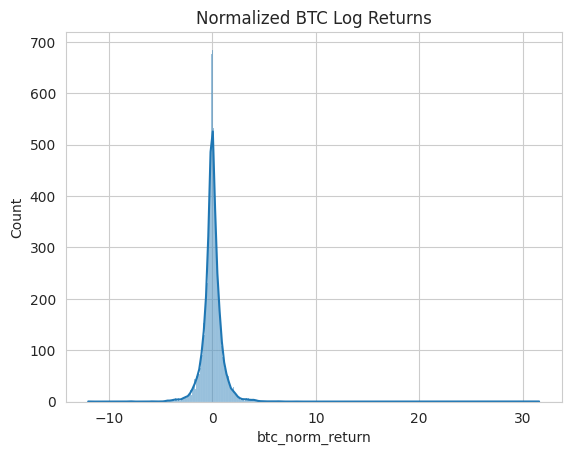

In [ ]:
# Plot distributions
import seaborn as sns
sns.histplot(combined['btc_norm_return'], kde=True)
plt.title("Normalized BTC Log Returns")
plt.show()

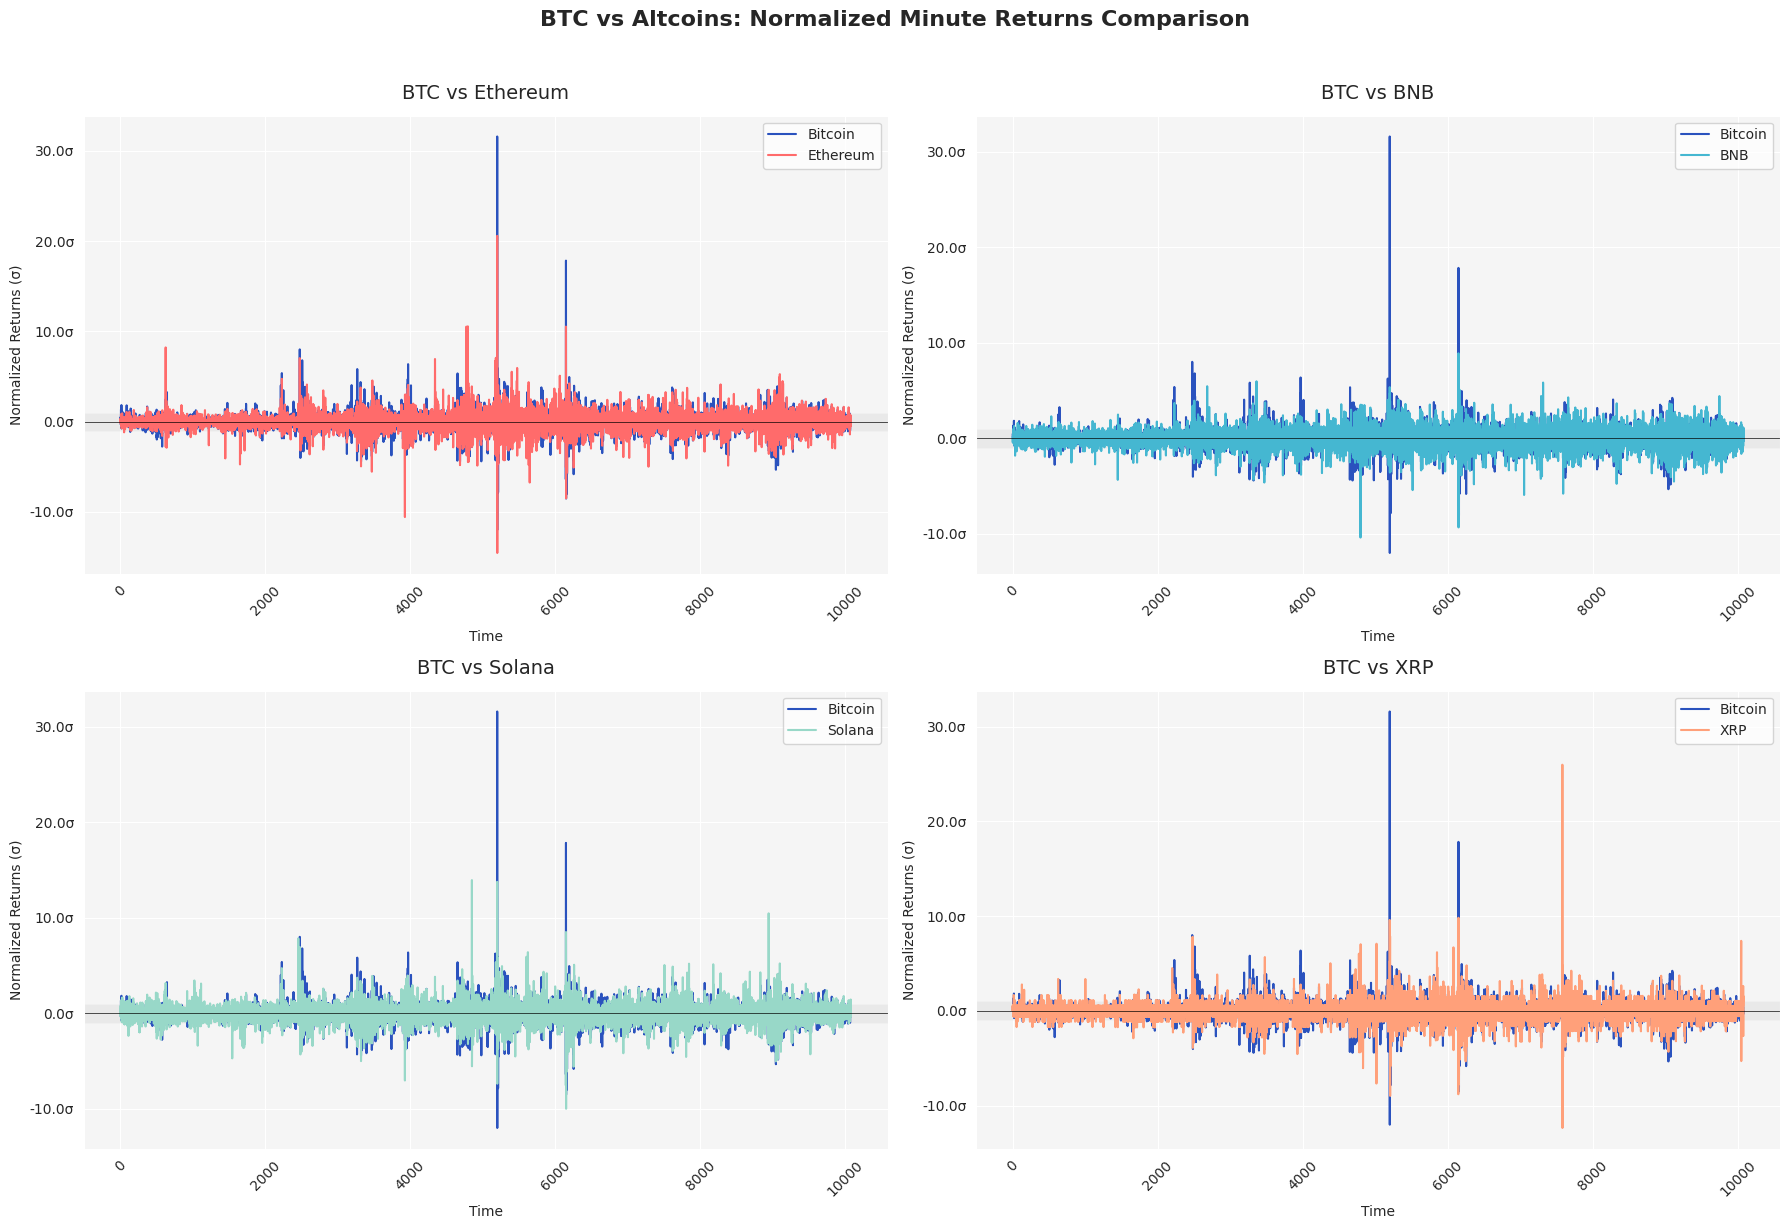

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set global style
sns.set_style("darkgrid")
plt.rcParams['axes.facecolor'] = '#f5f5f5'
colors = ['#2a52be', '#ff6b6b', '#45b7d1', '#98d8c8', '#ffa07a']  # BTC blue + complementary colors

# List of coins to compare with BTC
coins_to_compare = ['eth', 'bnb', 'sol', 'xrp']
labels = ['Ethereum', 'BNB', 'Solana', 'XRP']

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('BTC vs Altcoins: Normalized Minute Returns Comparison',
             fontsize=16, y=1.02, fontweight='bold')

# Plot each pair
for i, (coin, label) in enumerate(zip(coins_to_compare, labels)):
    ax = axes[i//2, i%2]

    # Plot both series
    sns.lineplot(data=combined, x=combined.index, y='btc_norm_return',
                 ax=ax, color=colors[0], label='Bitcoin', linewidth=1.5)
    sns.lineplot(data=combined, x=combined.index, y=f'{coin}_norm_return',
                 ax=ax, color=colors[i+1], label=label, linewidth=1.5)

    # Formatting
    ax.set_title(f'BTC vs {label}', pad=12, fontsize=14)
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Normalized Returns (σ)', fontsize=10)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}σ'))

    # Add zero line and bands
    ax.axhline(0, color='black', linestyle='-', linewidth=0.7, alpha=0.7)
    ax.axhspan(-1, 1, facecolor='gray', alpha=0.1)

    # Custom legend
    ax.legend(loc='upper right', frameon=True, facecolor='white')

    # Rotate x-ticks
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

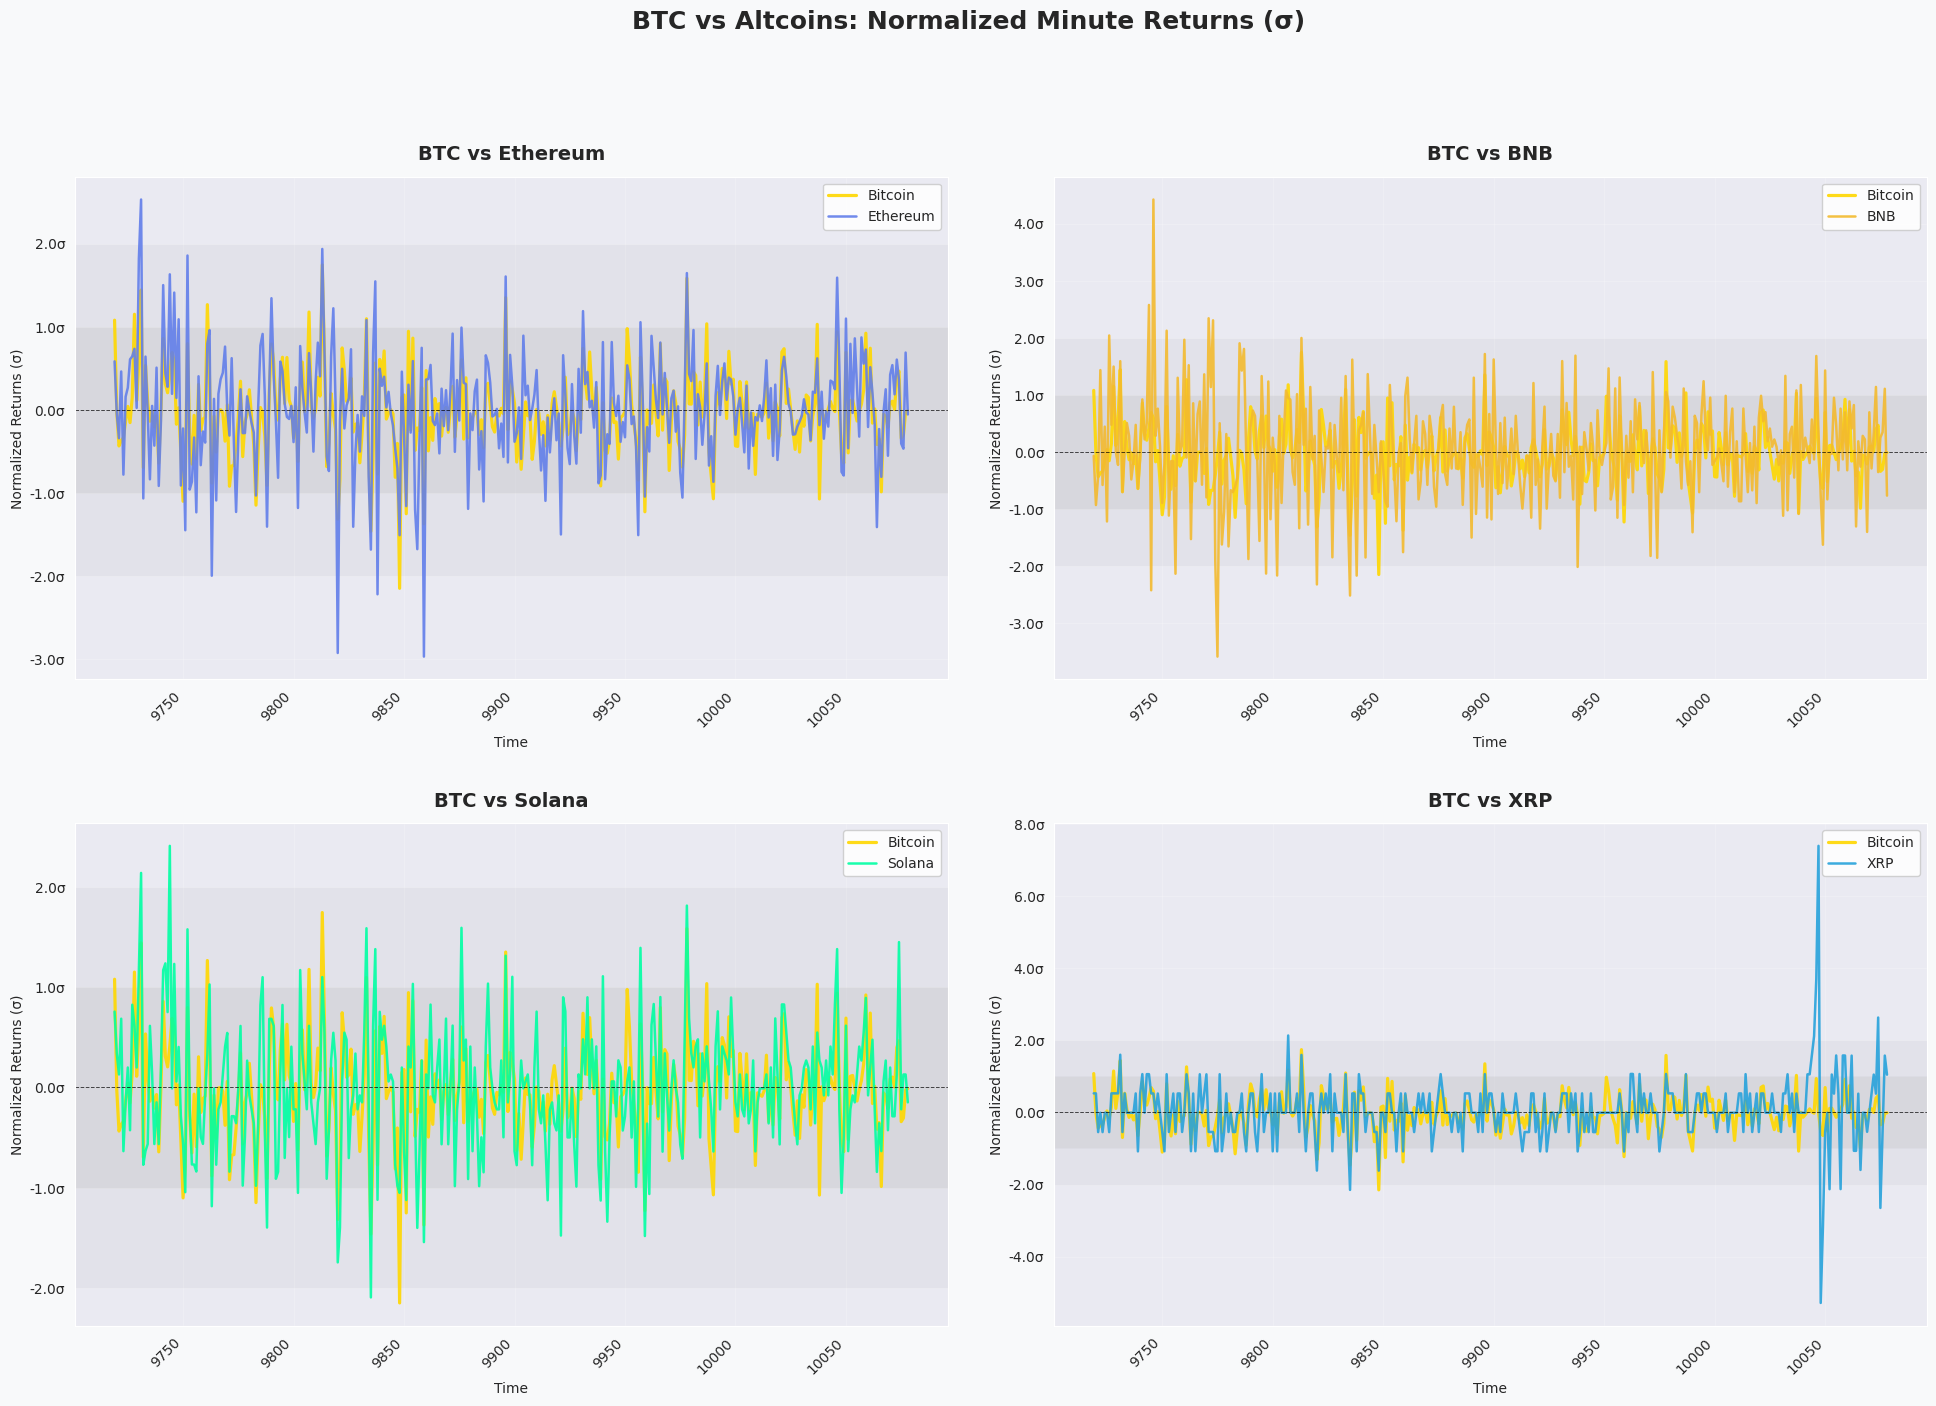

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set up professional styling using seaborn's context
# instead of directly through Matplotlib
sns.set_style("darkgrid")

# Set global color palette using seaborn
sns.set_palette("husl")

# Update plot settings using plt.rcParams
plt.rcParams['figure.facecolor'] = '#f8f9fa'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.2

# Create figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 14), dpi=100)
fig.suptitle('BTC vs Altcoins: Normalized Minute Returns (σ)',
             fontsize=18, y=1.02, fontweight='bold')

# Custom color palette (BTC in gold, alts in distinct colors)
colors = {
    'btc': '#FFD700',  # Gold
    'eth': '#627EEA',  # Ethereum blue
    'bnb': '#F3BA2F',  # BNB yellow
    'sol': '#00FFA3',  # Solana green
    'xrp': '#27A2DB'   # XRP blue
}

# Plot configuration
line_width = 1.8
alpha = 0.9
time_window = 360  # Last 6 hours of data

# Plot each comparison
pairs = [
    ('btc', 'eth', 'Ethereum', axs[0,0]),
    ('btc', 'bnb', 'BNB', axs[0,1]),
    ('btc', 'sol', 'Solana', axs[1,0]),
    ('btc', 'xrp', 'XRP', axs[1,1])
]

for btc_col, alt_col, alt_name, ax in pairs:
    # Plot BTC (thicker line for emphasis)
    sns.lineplot(data=combined.iloc[-time_window:], x=combined.index[-time_window:],
                 y=f'{btc_col}_norm_return', ax=ax,
                 color=colors[btc_col], label='Bitcoin',
                 linewidth=line_width+0.5, alpha=alpha)

    # Plot Altcoin
    sns.lineplot(data=combined.iloc[-time_window:], x=combined.index[-time_window:],
                 y=f'{alt_col}_norm_return', ax=ax,
                 color=colors[alt_col], label=alt_name,
                 linewidth=line_width, alpha=alpha)

    # Formatting
    ax.set_title(f'BTC vs {alt_name}', fontsize=14, pad=12, fontweight='semibold')
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Normalized Returns (σ)', fontsize=10)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}σ'))

    # Reference lines and bands
    ax.axhline(0, color='black', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.axhspan(-1, 1, facecolor='#000000', alpha=0.05)
    ax.axhspan(-2, 2, facecolor='#000000', alpha=0.03)

    # Legend
    ax.legend(loc='upper right', frameon=True,
              facecolor='white', framealpha=0.9)

    # Rotate x-ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Tight layout with padding
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

def plot_btc_vs_alt(btc_data, alt_data, alt_name, color, time_window=360):
    """Create a single beautiful BTC vs Altcoin plot"""
    plt.figure(figsize=(12, 6), dpi=120)

    # Custom styling
    sns.set_style("whitegrid")
    plt.rcParams['axes.facecolor'] = '#f8f9fa'

    # Plot BTC (gold)
    plt.plot(btc_data.index[-time_window:],
             btc_data[-time_window:],
             color='#FFD700',
             linewidth=2.5,
             alpha=0.9,
             label='Bitcoin')

    # Plot Altcoin
    plt.plot(alt_data.index[-time_window:],
             alt_data[-time_window:],
             color=color,
             linewidth=2,
             alpha=0.9,
             label=alt_name)

    # Formatting
    plt.title(f'BTC vs {alt_name}: Normalized Minute Returns',
              fontsize=16, pad=15, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Normalized Returns (σ)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}σ'))

    # Reference lines
    plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    plt.axhspan(-1, 1, facecolor='#000000', alpha=0.05)

    # Legend
    plt.legend(loc='upper right', frameon=True,
               facecolor='white', framealpha=0.9)

    # Rotate x-ticks
    plt.xticks(rotation=45, ha='right')

    # Tight layout
    plt.tight_layout()

    # Save as separate file
    filename = f"BTC_vs_{alt_name}_normalized_returns.png"
    plt.savefig(filename, bbox_inches='tight', dpi=120)
    plt.close()
    print(f"Saved {filename}")

In [ ]:
# Color palette for altcoins
altcoin_colors = {
    'Ethereum': '#627EEA',
    'BNB': '#F3BA2F',
    'Solana': '#00FFA3',
    'XRP': '#27A2DB'
}

# Generate plots
plot_btc_vs_alt(combined['btc_norm_return'], combined['eth_norm_return'],
                'Ethereum', altcoin_colors['Ethereum'])

plot_btc_vs_alt(combined['btc_norm_return'], combined['bnb_norm_return'],
                'BNB', altcoin_colors['BNB'])

plot_btc_vs_alt(combined['btc_norm_return'], combined['sol_norm_return'],
                'Solana', altcoin_colors['Solana'])

plot_btc_vs_alt(combined['btc_norm_return'], combined['xrp_norm_return'],
                'XRP', altcoin_colors['XRP'])

Saved BTC_vs_Ethereum_normalized_returns.png
Saved BTC_vs_BNB_normalized_returns.png
Saved BTC_vs_Solana_normalized_returns.png
Saved BTC_vs_XRP_normalized_returns.png


<ipython-input-27-0c57615823db>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


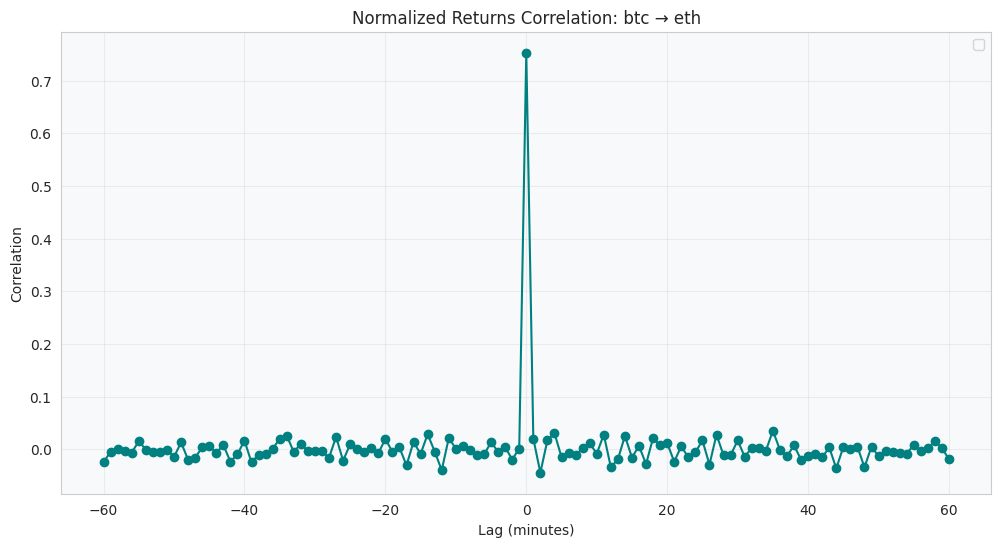

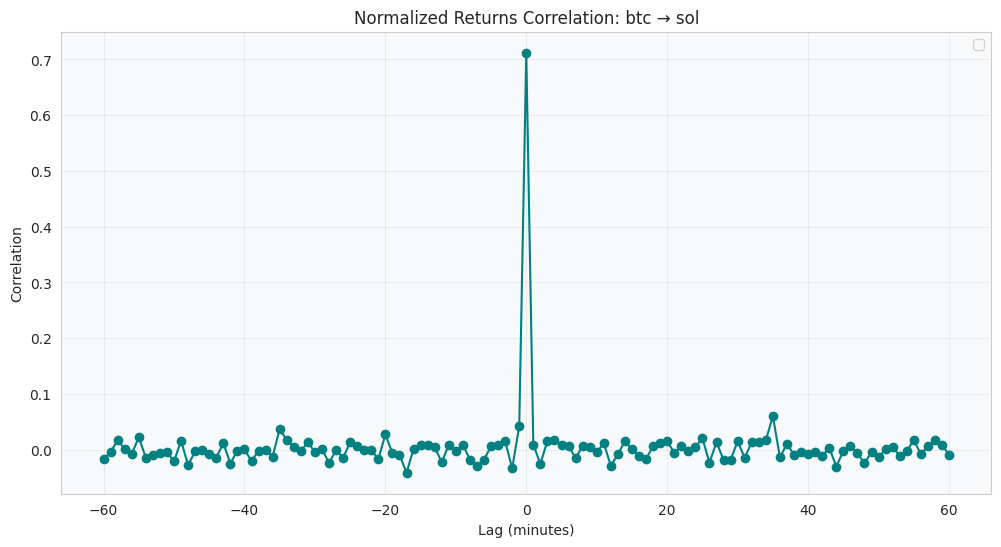

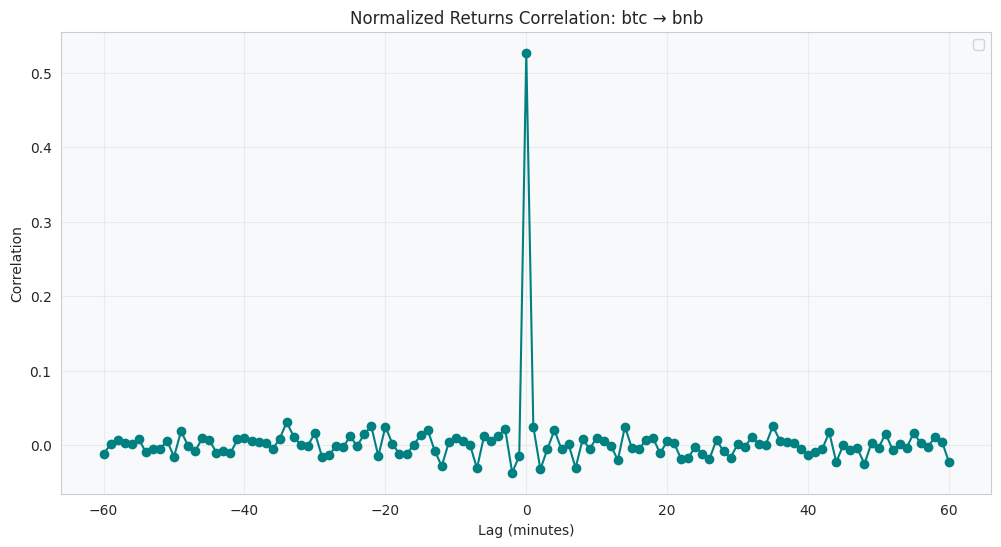

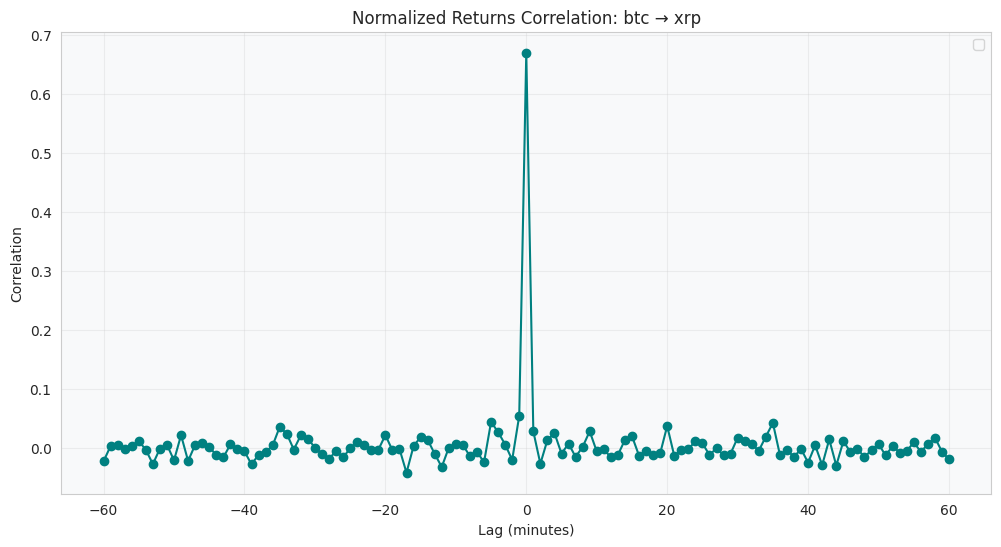

In [ ]:
def plot_normalized_correlation(df, coin1, coin2, max_lag=60):
    x = df[f'{coin1.lower()}_norm_return']
    y = df[f'{coin2.lower()}_norm_return']

    lags = range(-max_lag, max_lag + 1)
    corr = [x.corr(y.shift(lag)) for lag in lags]

    plt.figure(figsize=(12, 6))
    plt.plot(lags, corr, marker='o', color='teal')
    plt.title(f"Normalized Returns Correlation: {coin1} → {coin2}")
    plt.xlabel('Lag (minutes)')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Example: Shifted BTC vs ETH
plot_normalized_correlation(combined, 'btc', 'eth')
plot_normalized_correlation(combined,'btc','sol')
plot_normalized_correlation(combined,'btc','bnb')
plot_normalized_correlation(combined,'btc','xrp')

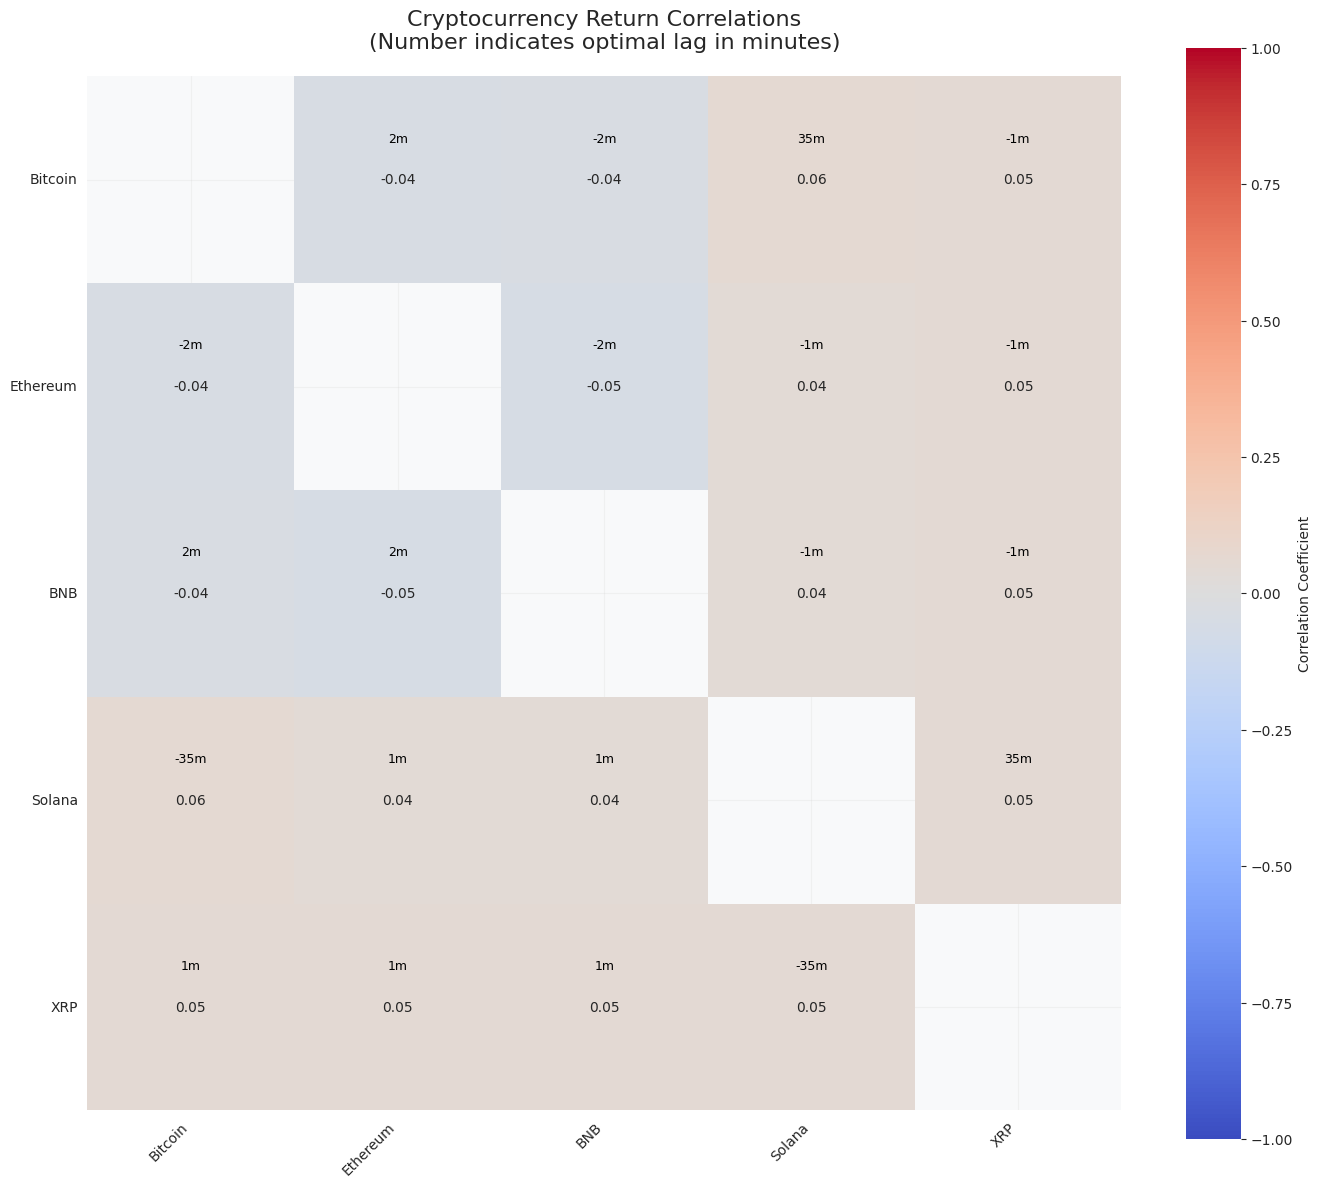

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Set up
coins = ['btc', 'eth', 'bnb', 'sol', 'xrp']
labels = ['Bitcoin', 'Ethereum', 'BNB', 'Solana', 'XRP']
max_lag = 60  # Look at ±20 minute delays
n_coins = len(coins)

# Create matrix to store maximum correlations
corr_matrix = np.zeros((n_coins, n_coins))
lag_matrix = np.zeros((n_coins, n_coins), dtype=int)

# Calculate all pairwise delayed correlations
for i, coin1 in enumerate(coins):
    for j, coin2 in enumerate(coins):
        if coin1 == coin2:
            corr_matrix[i,j] = 1.0  # Self-correlation
            lag_matrix[i,j] = 0
            continue

        # Calculate correlations at different lags
        x = combined[f'{coin1}_norm_return'].dropna()
        y = combined[f'{coin2}_norm_return'].dropna()
        lags =[lag for lag in range(-max_lag, max_lag+1) if lag != 0]
        correlations = [x.corr(y.shift(lag)) for lag in lags]

        # Find lag with maximum correlation
        max_idx = np.argmax(np.abs(correlations))
        corr_matrix[i,j] = correlations[max_idx]
        lag_matrix[i,j] = lags[max_idx]

# Create the figure
plt.figure(figsize=(14, 12))

# Plot correlation matrix
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            mask=np.eye(n_coins),  # Hide diagonal
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=labels,
            yticklabels=labels)

# Add lag annotations
for i in range(n_coins):
    for j in range(n_coins):
        if i != j:
            plt.text(j+0.5, i+0.3, f'{lag_matrix[i,j]}m',
                     ha='center', va='center',
                     fontsize=9, color='black')

plt.title('Cryptocurrency Return Correlations\n(Number indicates optimal lag in minutes)',
          fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save and show
plt.savefig('crypto_correlation_matrix.png', dpi=120, bbox_inches='tight')
plt.show()

In [ ]:
import requests
import pandas as pd
from datetime import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_crypto_data(symbol, total_minutes=10080):
    """Fetch minute-level historical data for a cryptocurrency"""
    url = 'https://min-api.cryptocompare.com/data/v2/histominute'
    dfs = []
    limit_per_call = 2000
    toTs = int(time.time())

    while total_minutes > 0:
        limit = min(limit_per_call, total_minutes)
        params = {
            'fsym': symbol,
            'tsym': 'USD',
            'limit': limit - 1,
            'toTs': toTs,
            'aggregate': 1
        }
        response = requests.get(url, params=params)
        result = response.json()

        if result.get('Response') != 'Success':
            print(f"API Error for {symbol}:", result.get('Message', 'Unknown error'))
            break

        data = result['Data']['Data']
        df = pd.DataFrame(data)
        df['time'] = pd.to_datetime(df['time'], unit='s')
        df.set_index('time', inplace=True)
        dfs.append(df[['close']].rename(columns={'close': f'{symbol.lower()}_price'}))

        if len(df) > 0:
            earliest_time = df.index.min()
            toTs = int(earliest_time.timestamp()) - 1
        else:
            break

        total_minutes -= limit
        time.sleep(0.25)  # Rate limit protection

    if dfs:
        full_df = pd.concat(dfs).sort_index()
        return full_df
    else:
        return pd.DataFrame()

# Fetch BTC, LTC, BCH data
coins = ['BTC', 'LTC', 'BCH']
dfs = [fetch_crypto_data(coin) for coin in coins]

# Combine into single DataFrame
combined2 = pd.concat(dfs, axis=1).dropna()
print(f"Fetched {len(combined2)} minutes of data")
print(combined2.head())



Fetched 10079 minutes of data
                     btc_price  ltc_price  bch_price
time                                                
2025-04-30 10:07:00   94921.14      84.78     366.15
2025-04-30 10:08:00   94910.04      84.76     366.05
2025-04-30 10:09:00   94913.92      84.76     365.85
2025-04-30 10:10:00   94912.54      84.75     366.00
2025-04-30 10:11:00   94917.46      84.77     365.81


In [ ]:
import numpy as np

# Calculate log returns (percent change between minutes)
for coin in ['btc', 'ltc', 'bch']:
    combined2[f'{coin}_log_return'] = np.log(combined2[f'{coin}_price'] / combined2[f'{coin}_price'].shift(1))

def normalize_returns(series):
    mean_return = series.mean()  # Should be close to 0
    print(f"{series.name} mean return: {mean_return:.6f}")  # More informative output

    normalized = []
    for i in range(len(series)):
        # Exclude current point for std calculation
        std = series.drop(series.index[i]).std()
        normalized_val = (series.iloc[i] - mean_return) / std
        normalized.append(normalized_val)

    return pd.Series(normalized, index=series.index, name=f'{series.name}_norm')

# Apply normalization to each cryptocurrency
for coin in ['btc', 'ltc', 'bch']:
    col_name = f'{coin}_log_return'
    combined2[f'{coin}_norm_return'] = normalize_returns(combined2[col_name].dropna())

# Verify the results
print("\nNormalized returns summary:")
print(combined2[[f'{coin}_norm_return' for coin in ['btc', 'ltc', 'bch']]].describe())

btc_log_return mean return: 0.000002
ltc_log_return mean return: 0.000008
bch_log_return mean return: 0.000002

Normalized returns summary:
       btc_norm_return  ltc_norm_return  bch_norm_return
count     10078.000000     10078.000000     10078.000000
mean          0.000011         0.000023        -0.000005
std           1.000460         1.001345         1.001059
min          -7.714360       -17.001052       -11.818406
25%          -0.432740        -0.419828        -0.443834
50%           0.004801        -0.009716        -0.002898
75%           0.429945         0.412092         0.434330
max           8.011829        14.543909        14.778346


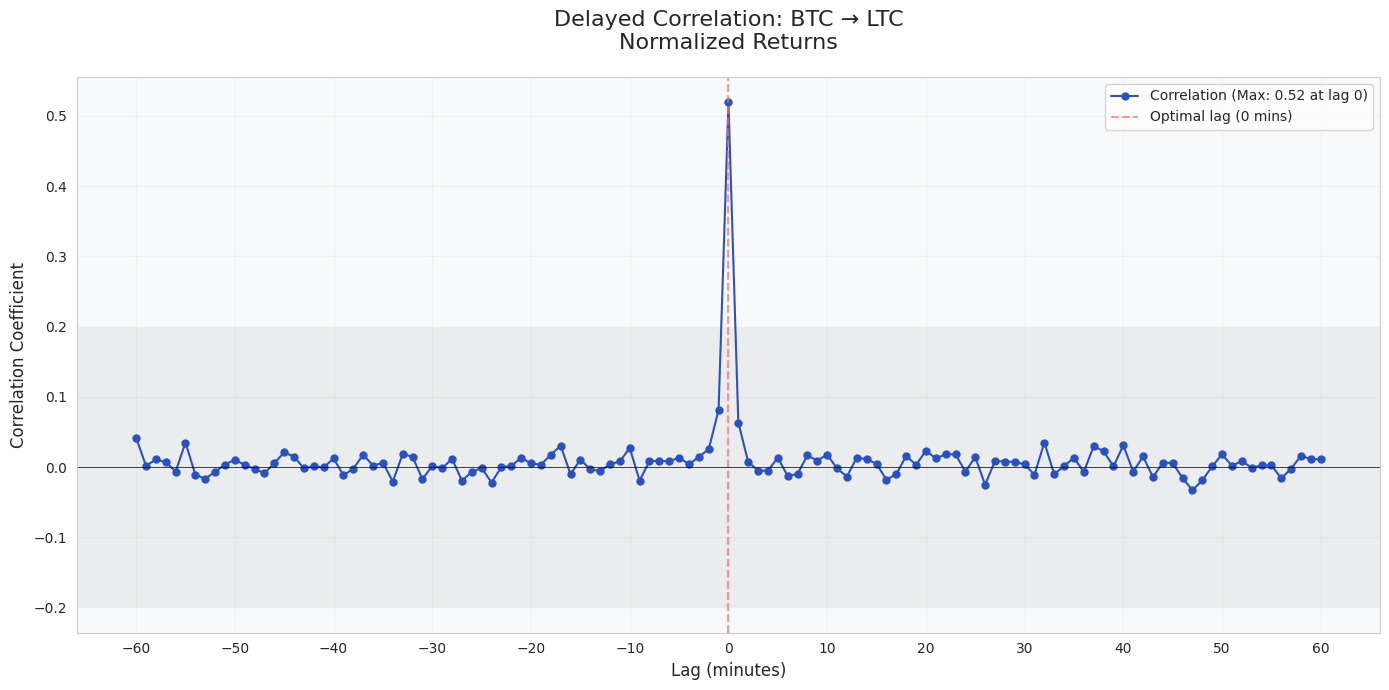

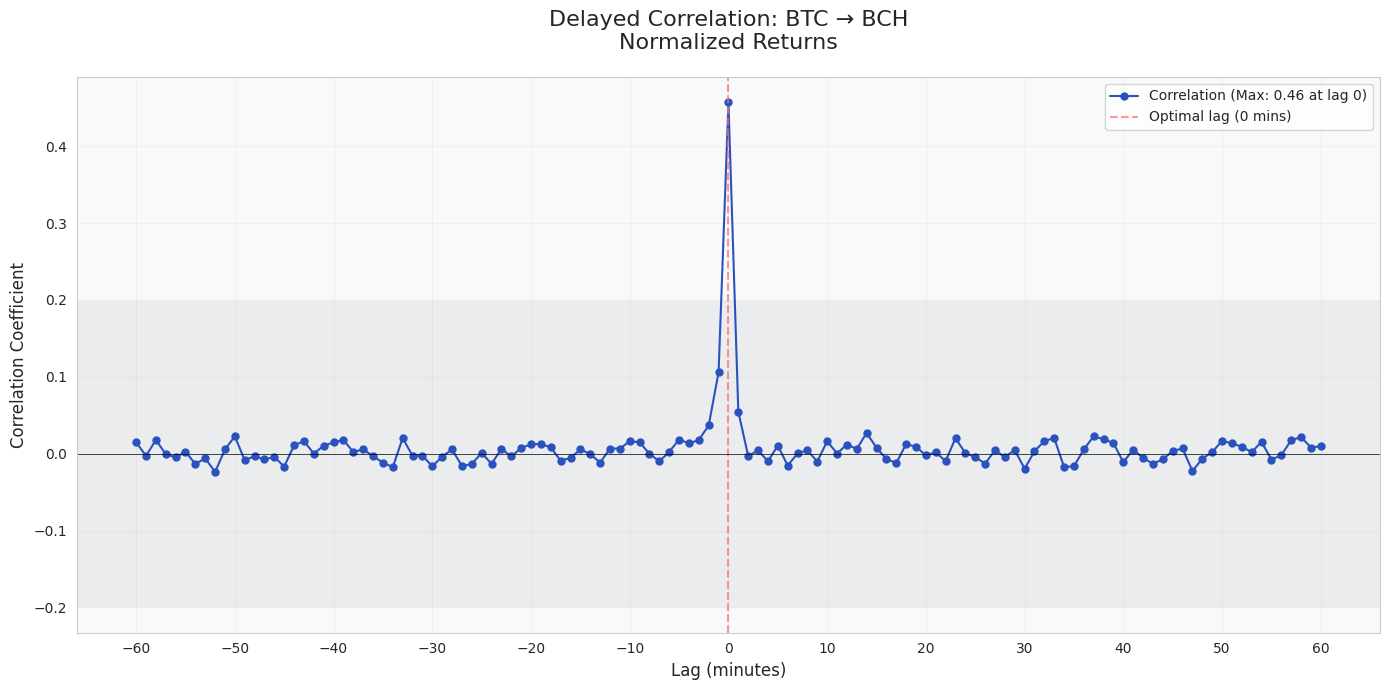

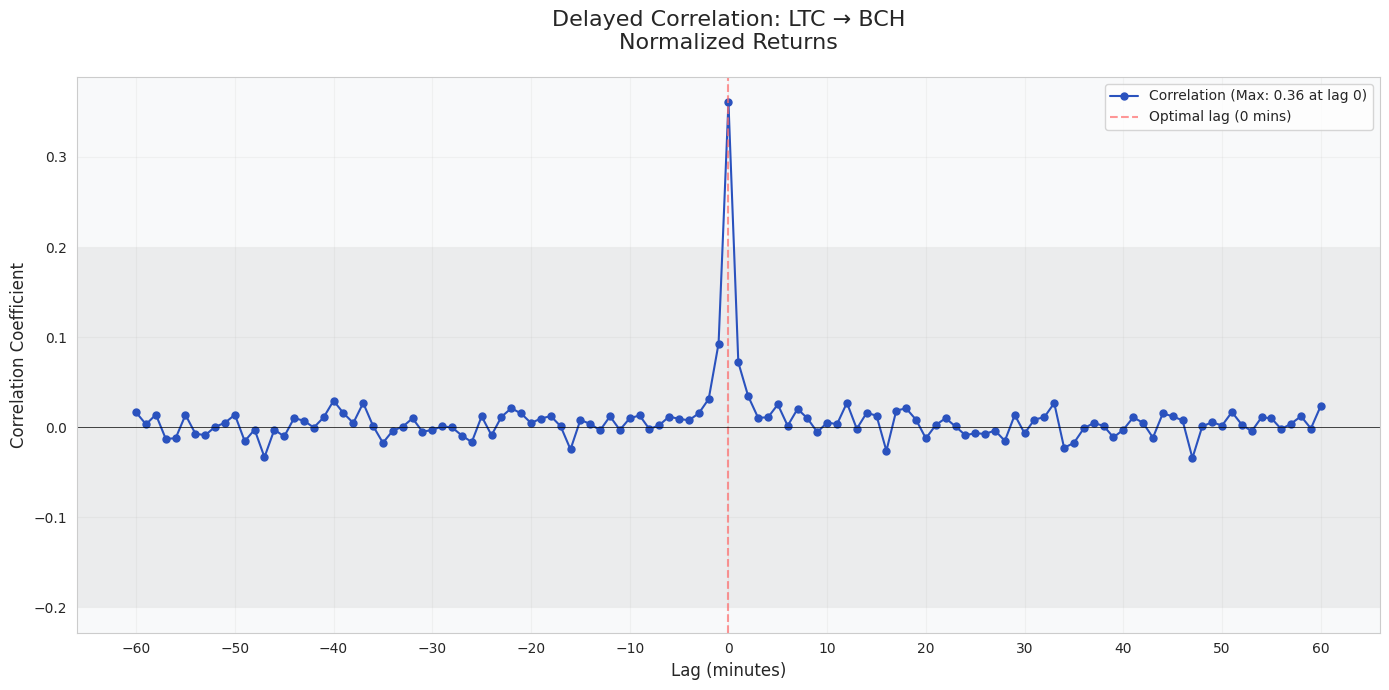

In [ ]:
def plot_normalized_correlation(df, coin1, coin2, max_lag=60):
    """Plot correlation between normalized returns of two coins at different time lags"""
    plt.figure(figsize=(14, 7))

    # Get normalized return series
    x = df[f'{coin1.lower()}_norm_return'].dropna()
    y = df[f'{coin2.lower()}_norm_return'].dropna()

    # Calculate correlations at different lags
    lags = range(-max_lag, max_lag + 1)
    correlations = [x.corr(y.shift(lag)) for lag in lags]

    # Find lag with maximum correlation
    max_corr = max(correlations, key=abs)
    optimal_lag = lags[correlations.index(max_corr)]

    # Plotting
    plt.plot(lags, correlations,
             marker='o',
             markersize=5,
             linestyle='-',
             linewidth=1.5,
             color='#2a52be',  # Rich blue
             label=f'Correlation (Max: {max_corr:.2f} at lag {optimal_lag})')

    # Formatting
    plt.title(f'Delayed Correlation: {coin1.upper()} → {coin2.upper()}\nNormalized Returns',
              fontsize=16, pad=20)
    plt.xlabel('Lag (minutes)', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)

    # Reference lines
    plt.axvline(x=optimal_lag, color='#FF6B6B', linestyle='--', alpha=0.7,
                label=f'Optimal lag ({optimal_lag} mins)')
    plt.axhline(y=0, color='black', linewidth=0.5)
    plt.axhspan(-0.2, 0.2, facecolor='gray', alpha=0.1)  # Highlight weak correlation zone

    plt.legend(loc='upper right', frameon=True, facecolor='white')
    plt.grid(alpha=0.2)
    plt.xticks(np.arange(-max_lag, max_lag+1, 10))
    plt.tight_layout()
    plt.show()

# Generate all pairwise BTC correlation plots
for altcoin in ['LTC', 'BCH']:
    plot_normalized_correlation(combined2, 'BTC', altcoin)

# Bonus: LTC vs BCH correlation
plot_normalized_correlation(combined2, 'LTC', 'BCH')

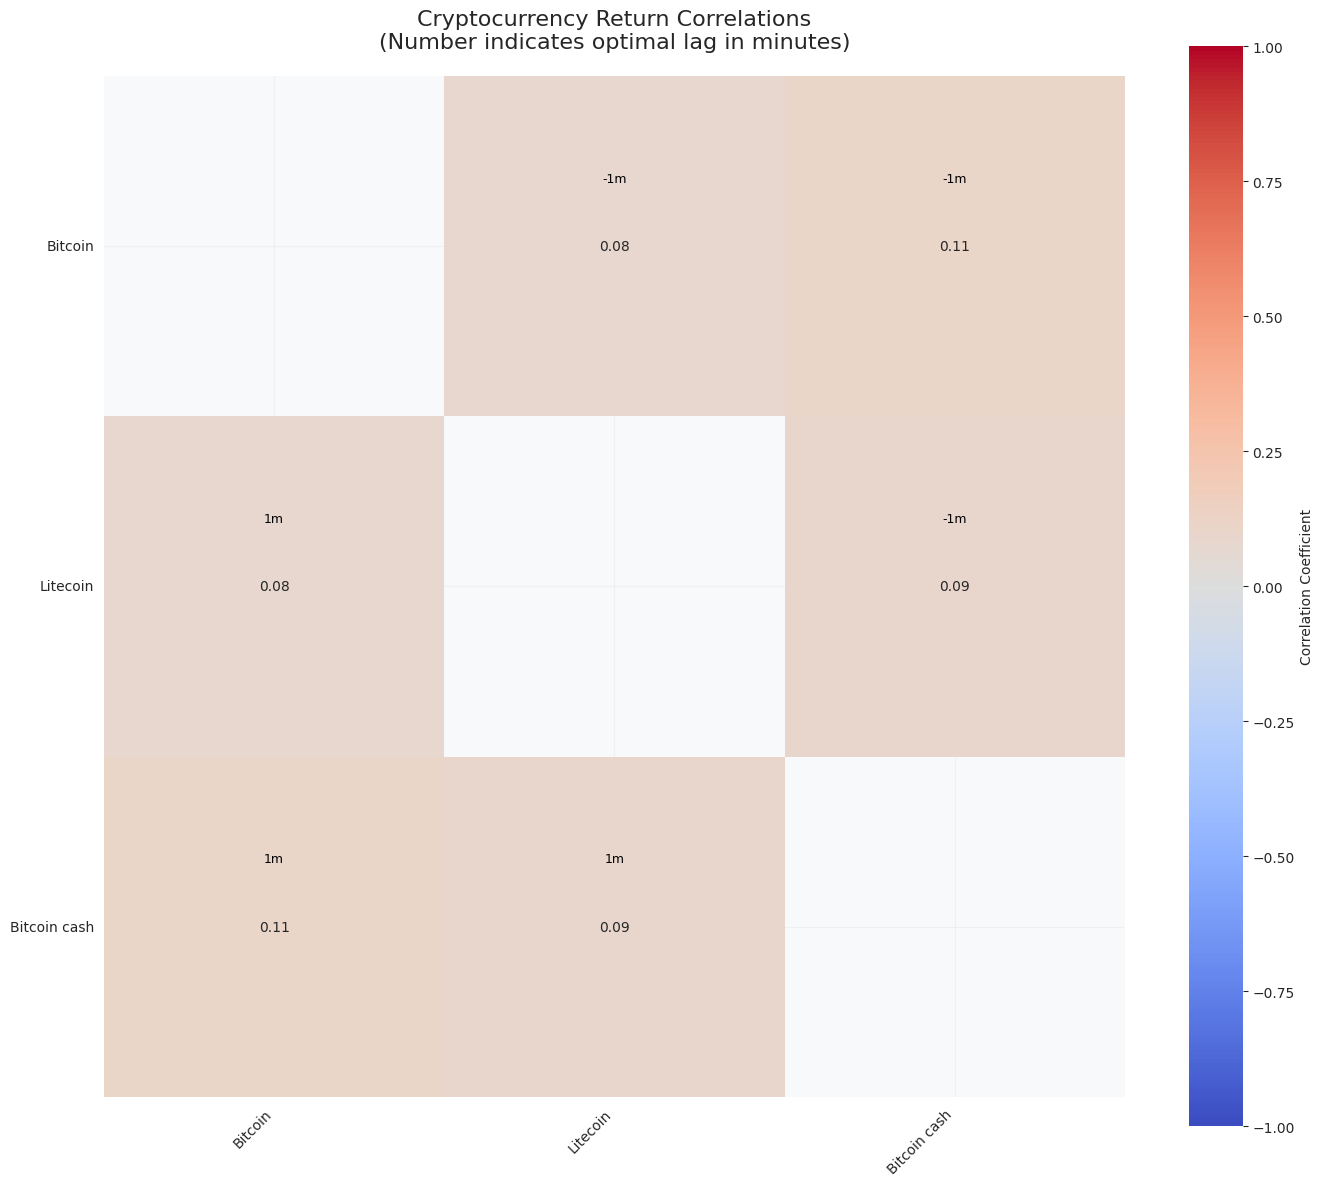

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Set up
coins = ['btc', 'ltc', 'bch']
labels = ['Bitcoin', 'Litecoin', 'Bitcoin cash']
max_lag = 60  # Look at ±20 minute delays
n_coins = len(coins)

# Create matrix to store maximum correlations
corr_matrix = np.zeros((n_coins, n_coins))
lag_matrix = np.zeros((n_coins, n_coins), dtype=int)

# Calculate all pairwise delayed correlations
for i, coin1 in enumerate(coins):
    for j, coin2 in enumerate(coins):
        if coin1 == coin2:
            corr_matrix[i,j] = 1.0  # Self-correlation
            lag_matrix[i,j] = 0
            continue

        # Calculate correlations at different lags
        x = combined2[f'{coin1}_norm_return'].dropna()
        y = combined2[f'{coin2}_norm_return'].dropna()
        lags =[lag for lag in range(-max_lag, max_lag+1) if lag != 0]
        correlations = [x.corr(y.shift(lag)) for lag in lags]

        # Find lag with maximum correlation
        max_idx = np.argmax(np.abs(correlations))
        corr_matrix[i,j] = correlations[max_idx]
        lag_matrix[i,j] = lags[max_idx]

# Create the figure
plt.figure(figsize=(14, 12))

# Plot correlation matrix
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            mask=np.eye(n_coins),  # Hide diagonal
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=labels,
            yticklabels=labels)

# Add lag annotations
for i in range(n_coins):
    for j in range(n_coins):
        if i != j:
            plt.text(j+0.5, i+0.3, f'{lag_matrix[i,j]}m',
                     ha='center', va='center',
                     fontsize=9, color='black')

plt.title('Cryptocurrency Return Correlations\n(Number indicates optimal lag in minutes)',
          fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save and show
plt.savefig('crypto_correlation_matrix.png', dpi=120, bbox_inches='tight')
plt.show()

In [ ]:
combined

,time,btc_price,eth_price,bnb_price,sol_price,xrp_price,btc_log_return,eth_log_return,bnb_log_return,sol_log_return,xrp_log_return,btc_norm_return,eth_norm_return,bnb_norm_return,sol_norm_return,xrp_norm_return
0,2025-04-19 07:09:00,84925.78,1597.07,592.10,138.51,2.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-19 07:10:00,84947.67,1597.05,592.09,138.61,2.081,0.000258,-0.000013,-0.000017,0.000722,0.000481,0.453736,-0.027038,-0.036338,0.750820,0.556629
2,2025-04-19 07:11:00,84953.64,1597.06,591.96,138.60,2.081,0.000070,0.000006,-0.000220,-0.000072,0.000000,0.109281,-0.006509,-0.425118,-0.085653,-0.007906
3,2025-04-19 07:12:00,84960.48,1597.06,592.03,138.58,2.082,0.000081,0.000000,0.000118,-0.000144,0.000480,0.128089,-0.013352,0.222851,-0.161688,0.556358
4,2025-04-19 07:13:00,84963.43,1597.53,592.03,138.57,2.082,0.000035,0.000294,0.000000,-0.000072,0.000000,0.043945,0.308237,-0.003945,-0.085669,-0.007906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,2025-04-26 07:03:00,94729.02,1806.63,604.20,151.89,2.227,0.000264,0.000343,-0.000182,0.001384,0.002248,0.464786,0.361781,-0.353108,1.448287,2.632912
10075,2025-04-26 07:04:00,94712.47,1805.98,604.28,151.86,2.222,-0.000175,-0.000360,0.000132,-0.000198,-0.002248,-0.340936,-0.406641,0.249998,-0.217764,-2.648740
10076,2025-04-26 07:05:00,94697.77,1805.23,604.39,151.88,2.221,-0.000155,-0.000415,0.000182,0.000132,-0.000450,-0.305092,-0.467324,0.345173,0.129124,-0.536609
10077,2025-04-26 07:06:00,94697.51,1806.39,604.74,151.90,2.224,-0.000003,0.000642,0.000579,0.000132,0.001350,-0.024905,0.688720,1.106521,0.129105,1.577661


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Suppose `data` is a DataFrame with columns ['btc_ret', 'eth_ret']
# and you’ve already computed log returns and ensured stationarity.

max_lag = 10  # test lags 1 through 10
combined=combined.dropna()
results = grangercausalitytests(combined[['eth_norm_return', 'btc_norm_return']], maxlag=max_lag, verbose=False)

# Examine p-values for each lag
for lag in range(1, max_lag+1):
    p_value = results[lag][0]['ssr_ftest'][1]
    print(f"Lag {lag}: p-value = {p_value:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Lag 1: p-value = 0.1899
Lag 2: p-value = 0.4455
Lag 3: p-value = 0.6601
Lag 4: p-value = 0.5454
Lag 5: p-value = 0.0158
Lag 6: p-value = 0.0249
Lag 7: p-value = 0.0374
Lag 8: p-value = 0.0498
Lag 9: p-value = 0.0729
Lag 10: p-value = 0.0269


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Suppose `data` is a DataFrame with columns ['btc_ret', 'eth_ret']
# and you’ve already computed log returns and ensured stationarity.

max_lag = 10  # test lags 1 through 10
results = grangercausalitytests(combined[['sol_norm_return', 'btc_norm_return']], maxlag=max_lag, verbose=False)

# Examine p-values for each lag
for lag in range(1, max_lag+1):
    p_value = results[lag][0]['ssr_ftest'][1]
    print(f"Lag {lag}: p-value = {p_value:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Lag 1: p-value = 0.0000
Lag 2: p-value = 0.0000
Lag 3: p-value = 0.0000
Lag 4: p-value = 0.0001
Lag 5: p-value = 0.0001
Lag 6: p-value = 0.0001
Lag 7: p-value = 0.0000
Lag 8: p-value = 0.0000
Lag 9: p-value = 0.0000
Lag 10: p-value = 0.0000


In [ ]:
combined.columns

Index(['time', 'btc_price', 'eth_price', 'bnb_price', 'sol_price', 'xrp_price',
       'btc_log_return', 'eth_log_return', 'bnb_log_return', 'sol_log_return',
       'xrp_log_return', 'btc_norm_return', 'eth_norm_return',
       'bnb_norm_return', 'sol_norm_return', 'xrp_norm_return'],
      dtype='object')

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Suppose `data` is a DataFrame with columns ['btc_ret', 'eth_ret']
# and you’ve already computed log returns and ensured stationarity.

max_lag = 10  # test lags 1 through 10
results = grangercausalitytests(combined[['xrp_norm_return', 'btc_norm_return']], maxlag=max_lag, verbose=False)

# Examine p-values for each lag
for lag in range(1, max_lag+1):
    p_value = results[lag][0]['ssr_ftest'][1]
    print(f"Lag {lag}: p-value = {p_value:.10f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Lag 1: p-value = 0.0000000000
Lag 2: p-value = 0.0000000000
Lag 3: p-value = 0.0000000000
Lag 4: p-value = 0.0000000000
Lag 5: p-value = 0.0000000000
Lag 6: p-value = 0.0000000000
Lag 7: p-value = 0.0000000000
Lag 8: p-value = 0.0000000000
Lag 9: p-value = 0.0000000000
Lag 10: p-value = 0.0000000000


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.tsatools import lagmat
from scipy.stats import f

def manual_granger_test(x: pd.Series, y: pd.Series, max_lag: int = 10):
    """
    Test whether x Granger-causes y for lags from 1 to max_lag.

    Parameters:
        x (pd.Series): Time series of the potential cause (e.g., BTC returns)
        y (pd.Series): Time series of the effect (e.g., XRP returns)
        max_lag (int): Maximum lag to test (default is 10)

    Prints:
        F-statistic and p-value for each lag
    """
    df = pd.concat([x.rename('x'), y.rename('y')], axis=1).dropna()

    for lag in range(1, max_lag + 1):
        # Create lag matrices
        y_lags = lagmat(df['y'], maxlag=lag, trim='both')
        x_lags = lagmat(df['x'], maxlag=lag, trim='both')
        y_target = df['y'].values[lag:]

        # Restricted model: y ~ past_y
        X_r = sm.add_constant(y_lags)
        model_r = sm.OLS(y_target, X_r).fit()
        rss_r = np.sum(model_r.resid ** 2)

        # Unrestricted model: y ~ past_y + past_x
        X_ur = sm.add_constant(np.hstack([y_lags, x_lags]))
        model_ur = sm.OLS(y_target, X_ur).fit()
        rss_ur = np.sum(model_ur.resid ** 2)

        # F-test
        df1 = lag
        df2 = len(y_target) - X_ur.shape[1]
        f_stat = ((rss_r - rss_ur) / df1) / (rss_ur / df2)
        p_value = 1 - f.cdf(f_stat, df1, df2)

        print(f"Lag {lag}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
    return f_stat, p_value


In [ ]:
manual_granger_test(combined['btc_norm_return'], combined['xrp_norm_return'], max_lag=10)


Lag 1: F-statistic = 93.4512, p-value = 0.0000
Lag 2: F-statistic = 47.7632, p-value = 0.0000
Lag 3: F-statistic = 32.5798, p-value = 0.0000
Lag 4: F-statistic = 24.3586, p-value = 0.0000
Lag 5: F-statistic = 23.8729, p-value = 0.0000
Lag 6: F-statistic = 20.1199, p-value = 0.0000
Lag 7: F-statistic = 17.2685, p-value = 0.0000
Lag 8: F-statistic = 15.1054, p-value = 0.0000
Lag 9: F-statistic = 13.5111, p-value = 0.0000
Lag 10: F-statistic = 12.4807, p-value = 0.0000


(np.float64(12.480650794186307), np.float64(1.1102230246251565e-16))

In [ ]:
manual_granger_test(combined['btc_norm_return'],combined['sol_norm_return'], max_lag=10)

Lag 1: F-statistic = 18.0814, p-value = 0.0000
Lag 2: F-statistic = 10.5012, p-value = 0.0000
Lag 3: F-statistic = 8.2004, p-value = 0.0000
Lag 4: F-statistic = 6.1093, p-value = 0.0001
Lag 5: F-statistic = 5.1535, p-value = 0.0001
Lag 6: F-statistic = 4.6058, p-value = 0.0001
Lag 7: F-statistic = 4.6467, p-value = 0.0000
Lag 8: F-statistic = 4.6448, p-value = 0.0000
Lag 9: F-statistic = 4.3622, p-value = 0.0000
Lag 10: F-statistic = 3.9666, p-value = 0.0000


(np.float64(3.9665985739338265), np.float64(1.9895454193119555e-05))

In [ ]:
manual_granger_test(combined['btc_norm_return'],combined['eth_norm_return'], max_lag=10)

Lag 1: F-statistic = 1.7190, p-value = 0.1899
Lag 2: F-statistic = 0.8086, p-value = 0.4455
Lag 3: F-statistic = 0.5322, p-value = 0.6601
Lag 4: F-statistic = 0.7687, p-value = 0.5454
Lag 5: F-statistic = 2.7958, p-value = 0.0158
Lag 6: F-statistic = 2.4114, p-value = 0.0249
Lag 7: F-statistic = 2.1281, p-value = 0.0374
Lag 8: F-statistic = 1.9407, p-value = 0.0498
Lag 9: F-statistic = 1.7475, p-value = 0.0729
Lag 10: F-statistic = 2.0273, p-value = 0.0269


(np.float64(2.0273250375188643), np.float64(0.026879509142172076))

In [ ]:
combined.columns

Index(['time', 'btc_price', 'eth_price', 'bnb_price', 'sol_price', 'xrp_price',
       'btc_log_return', 'eth_log_return', 'bnb_log_return', 'sol_log_return',
       'xrp_log_return', 'btc_norm_return', 'eth_norm_return',
       'bnb_norm_return', 'sol_norm_return', 'xrp_norm_return'],
      dtype='object')

In [ ]:
manual_granger_test(combined['btc_norm_return'],combined['bnb_norm_return'], max_lag=10)

Lag 1: F-statistic = 43.7676, p-value = 0.0000
Lag 2: F-statistic = 26.8747, p-value = 0.0000
Lag 3: F-statistic = 19.6928, p-value = 0.0000
Lag 4: F-statistic = 14.4988, p-value = 0.0000
Lag 5: F-statistic = 11.6258, p-value = 0.0000
Lag 6: F-statistic = 10.0996, p-value = 0.0000
Lag 7: F-statistic = 9.2616, p-value = 0.0000
Lag 8: F-statistic = 8.2816, p-value = 0.0000
Lag 9: F-statistic = 7.4958, p-value = 0.0000
Lag 10: F-statistic = 6.8971, p-value = 0.0000


(np.float64(6.897121709155756), np.float64(7.680223124140184e-11))

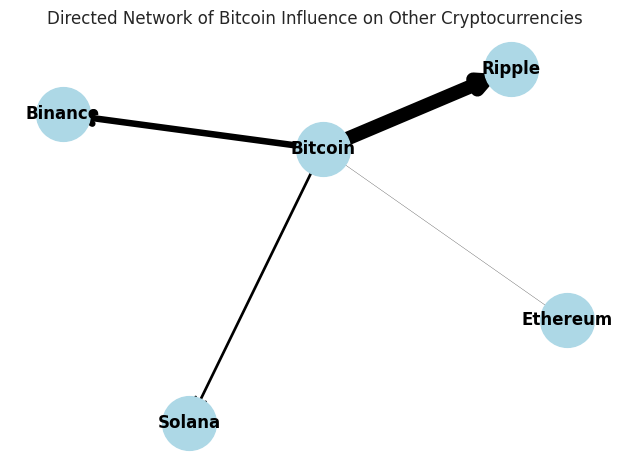

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Your data
edges = [
    ("Bitcoin", "Ethereum", 1.719),
    ("Bitcoin", "Solana", 18.0814),
    ("Bitcoin", "Binance", 43.7676),
    ("Bitcoin", "Ripple", 93.4512),
]

# Create a directed graph
G = nx.DiGraph()

# Add edges with strength as an attribute
for source, target, strength in edges:
    G.add_edge(source, target, weight=strength)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Layout for consistent node placement

# Extract edge weights for line thickness
weights = [G[u][v]['weight'] for u, v in G.edges()]
scaled_weights = [w / max(weights) * 10 for w in weights]  # Scale line thickness

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, width=scaled_weights)

# Show the plot
plt.title("Directed Network of Bitcoin Influence on Other Cryptocurrencies")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
combined2.columns

Index(['btc_price', 'ltc_price', 'bch_price', 'btc_log_return',
       'ltc_log_return', 'bch_log_return', 'btc_norm_return',
       'ltc_norm_return', 'bch_norm_return'],
      dtype='object')

In [ ]:
manual_granger_test(combined2['btc_norm_return'],combined2['ltc_norm_return'])

Lag 1: F-statistic = 33.5173, p-value = 0.0000
Lag 2: F-statistic = 16.8521, p-value = 0.0000
Lag 3: F-statistic = 11.2544, p-value = 0.0000
Lag 4: F-statistic = 8.5393, p-value = 0.0000
Lag 5: F-statistic = 6.9927, p-value = 0.0000
Lag 6: F-statistic = 6.5241, p-value = 0.0000
Lag 7: F-statistic = 5.5834, p-value = 0.0000
Lag 8: F-statistic = 4.9474, p-value = 0.0000
Lag 9: F-statistic = 5.2615, p-value = 0.0000
Lag 10: F-statistic = 4.8654, p-value = 0.0000


(np.float64(4.865404936188994), np.float64(4.911922765193921e-07))

In [ ]:
manual_granger_test(combined2['btc_norm_return'],combined2['bch_norm_return'])

Lag 1: F-statistic = 139.1999, p-value = 0.0000
Lag 2: F-statistic = 70.3054, p-value = 0.0000
Lag 3: F-statistic = 47.9367, p-value = 0.0000
Lag 4: F-statistic = 35.8064, p-value = 0.0000
Lag 5: F-statistic = 29.0726, p-value = 0.0000
Lag 6: F-statistic = 24.2078, p-value = 0.0000
Lag 7: F-statistic = 21.3314, p-value = 0.0000
Lag 8: F-statistic = 18.6716, p-value = 0.0000
Lag 9: F-statistic = 16.7542, p-value = 0.0000
Lag 10: F-statistic = 15.2791, p-value = 0.0000


(np.float64(15.279093450544742), np.float64(1.1102230246251565e-16))

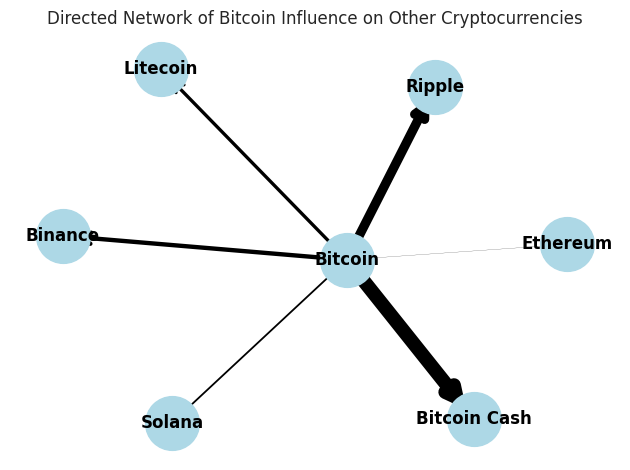

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Your data
edges = [
    ("Bitcoin", "Ethereum", 1.719),
    ("Bitcoin", "Solana", 18.0814),
    ("Bitcoin", "Binance", 43.7676),
    ("Bitcoin", "Ripple", 93.4512),
    ("Bitcoin","Litecoin",33.5173),
    ("Bitcoin","Bitcoin Cash",139.199)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges with strength as an attribute
for source, target, strength in edges:
    G.add_edge(source, target, weight=strength)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Layout for consistent node placement

# Extract edge weights for line thickness
weights = [G[u][v]['weight'] for u, v in G.edges()]
scaled_weights = [w / max(weights) * 10 for w in weights]  # Scale line thickness

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, width=scaled_weights)

# Show the plot
plt.title("Directed Network of Bitcoin Influence on Other Cryptocurrencies")
plt.axis('off')
plt.tight_layout()
plt.show()
